In [4]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt

data_path = os.path.join(os.getcwd(), 'data')

plt.style.use('ggplot')

### Defition

The output gap in macroeconomics is defined as the difference between the actual output of an economy (Y) and its potential output (Yf). A positive output gap occurs when actual growth is above the trend rate and can be inflationary, while a negative output gap indicates an economic downturn with unemployment and spare capacity, which may result in low inflation or deflation. 

### Estimators

$\textbf{Statistical Method (Hodrick-Prescott Filter):}$ The Hodrick-Prescott filter separates a time series into a trend and a cyclical component. The output gap is the cyclical component. The filter is defined by the following optimization problem:

$$
\min_{\tau} \sum_{t=1}^{T} (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} \left[(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})\right]^2
$$

where $y_t$ is the actual output, $\tau_t$ is the trend component, and $\lambda$ is the smoothing parameter. 

$\textbf{Production Function Approach:}$ This approach estimates the output gap based on a Cobb-Douglas production function, which is often represented as:

$$
Y = A \cdot K^{\alpha} \cdot L^{1-\alpha}
$$

where $Y$ is the output, $A$ is total factor productivity, $K$ is capital, $L$ is labor, and $\alpha$ is the output elasticity of capital.


$\textbf{Macroeconomic Models:}$ These models often use a system of equations that represent different aspects of the economy, such as IS-LM models or DSGE models. The output gap is then derived as part of the model solution.


In [6]:
us_gdp_level = pd.read_csv(os.path.join(data_path, 'GDPC1.csv'), index_col='DATE', parse_dates=True)

In [7]:
# apply HP filter (lambda=1600 for quarterly data)
us_gdp_cycle_hp, us_gdp_trend_hp = hpfilter(us_gdp_level, lamb=1600)

# apply moving average
us_gdp_trend_ma = us_gdp_level.rolling(window=3).mean()
us_gdp_cycle_ma = us_gdp_level - us_gdp_trend_ma

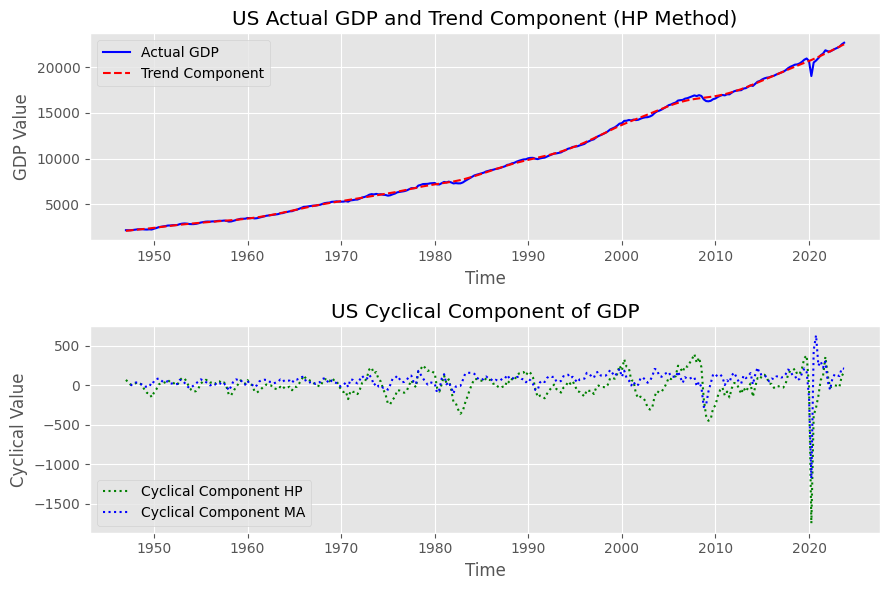

In [8]:
# Plotting the GDP data with its trend and a separate plot for the cyclical component
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 6))

# Plotting the actual GDP and its trend component
axes[0].plot(us_gdp_level, label='Actual GDP', color='blue')
axes[0].plot(us_gdp_trend_hp, label='Trend Component', color='red', linestyle='--')
axes[0].set_title('US Actual GDP and Trend Component (HP Method)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('GDP Value')
axes[0].legend()

# Plotting the cyclical component
axes[1].plot(us_gdp_cycle_hp, label='Cyclical Component HP', color='green', linestyle=':')
axes[1].plot(us_gdp_cycle_ma, label='Cyclical Component MA', color='blue', linestyle=':')
axes[1].set_title('US Cyclical Component of GDP')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Cyclical Value')
axes[1].legend()

plt.tight_layout()
plt.show()

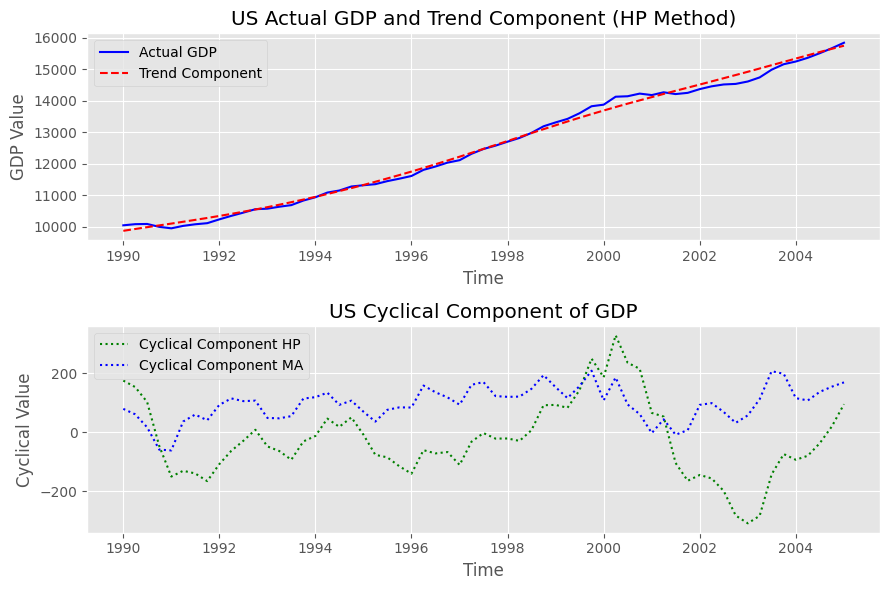

In [9]:
# Plotting the GDP data with its trend and a separate plot for the cyclical component
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 6))

# Plotting the actual GDP and its trend component
axes[0].plot(us_gdp_level.loc["1990-01-01":"2005-01-01"], label='Actual GDP', color='blue')
axes[0].plot(us_gdp_trend_hp.loc["1990-01-01":"2005-01-01"], label='Trend Component', color='red', linestyle='--')
axes[0].set_title('US Actual GDP and Trend Component (HP Method)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('GDP Value')
axes[0].legend()

# Plotting the cyclical component
axes[1].plot(us_gdp_cycle_hp.loc["1990-01-01":"2005-01-01"], label='Cyclical Component HP', color='green', linestyle=':')
axes[1].plot(us_gdp_cycle_ma.loc["1990-01-01":"2005-01-01"], label='Cyclical Component MA', color='blue', linestyle=':')
axes[1].set_title('US Cyclical Component of GDP')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Cyclical Value')
axes[1].legend()

plt.tight_layout()
plt.show()